In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [ ]:
importlib.reload(EyeTraumaAnalysis);

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

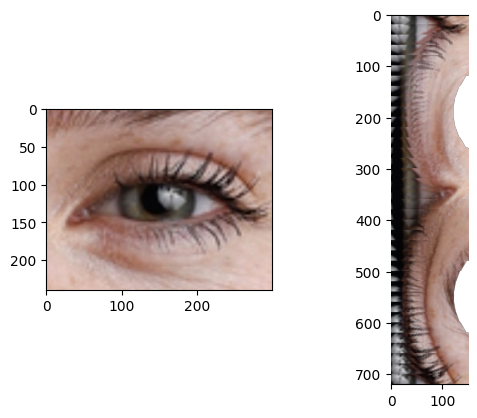

In [89]:
image = EyeTraumaAnalysis.Image("data/01_raw/11002.jpg")

interval_deg = 10
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=interval_deg,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )
concatenated = np.vstack([segment for ind,segment in segments.items()])

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(concatenated);
axs[1].spines["left"].set_visible(False)
axs[1].spines["right"].set_visible(False)

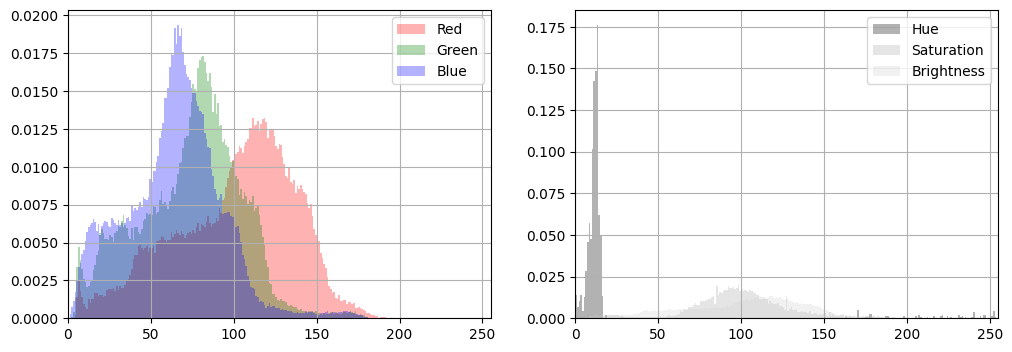

In [56]:
img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12,4))
axs[0].hist(image.img[...,0].ravel(),256,[0,256],density=True, alpha=.3, facecolor="red", label="Red");
axs[0].hist(image.img[...,1].ravel(),256,[0,256],density=True, alpha=.3, facecolor="green", label="Green");
axs[0].hist(image.img[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="blue", label="Blue");
axs[0].grid()
axs[0].set_xlim([0, 255]);
axs[0].legend();

axs[1].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, facecolor="black", label="Hue");
axs[1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, facecolor="darkgray", label="Saturation");
axs[1].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="lightgray", label="Brightness");
axs[1].grid()
axs[1].set_xlim([0, 255]);
axs[1].legend();


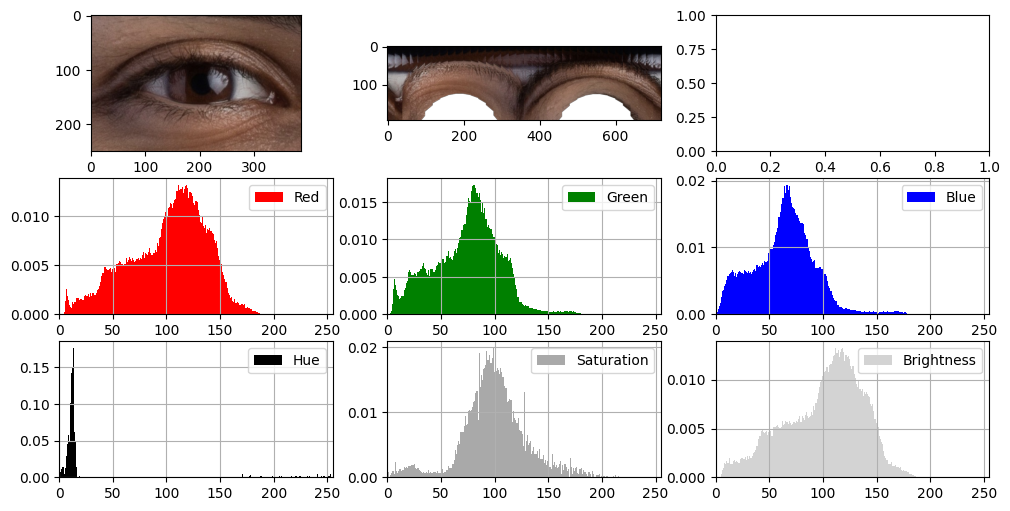

In [59]:
img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image.img)

axs[0,1].imshow(np.transpose(concatenated, axes=[1,0,2]))

axs[1,0].hist(image.img[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image.img[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image.img[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

#plt.hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="red", label="H");
#plt.hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="green");



In [67]:
img_hsv1[100,0]

array([178.5       , 141.66666667,   9.        ])

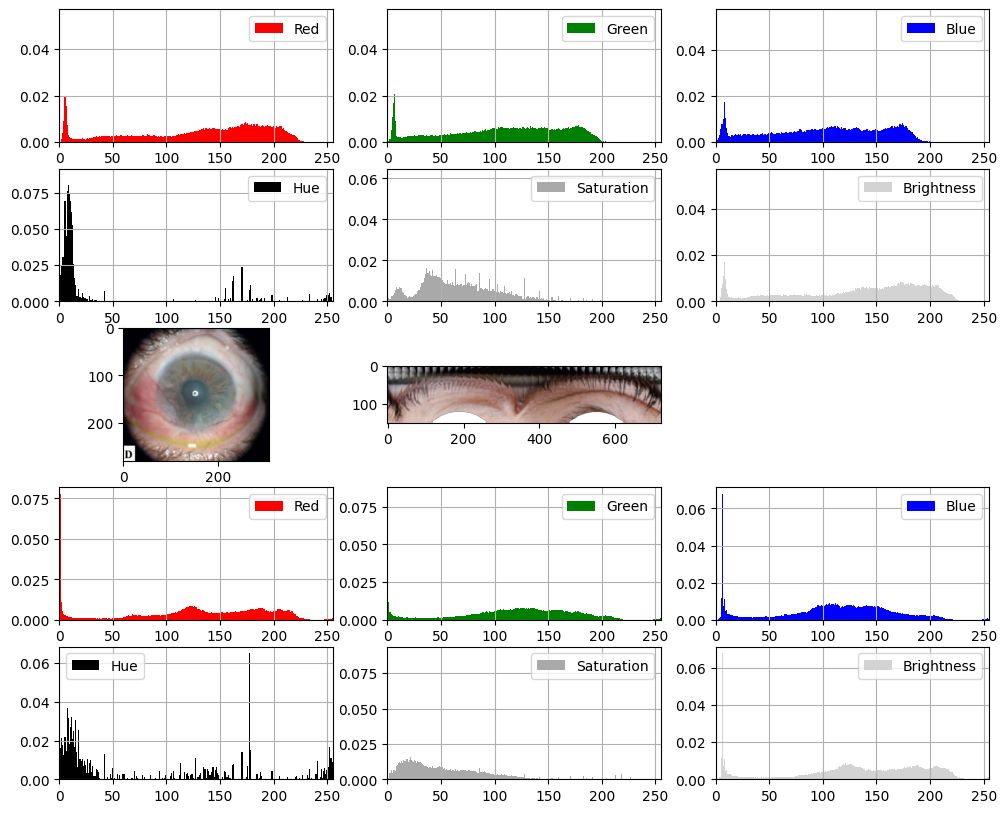

In [98]:
img_hsv1 = mpl.colors.rgb_to_hsv(concatenated[...,:3]/255.0) * 255

fig, axs = plt.subplots(5, 3, figsize=(12,10))

axs[0,0].hist(concatenated[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[0,1].hist(concatenated[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[0,2].hist(concatenated[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[1,0].hist(img_hsv1[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[1,1].hist(img_hsv1[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[1,2].hist(img_hsv1[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[:2,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

axs[2,0].imshow(image.img)
axs[2,1].imshow(np.transpose(concatenated, axes=[1,0,2]))
axs[2,2].axis("off")

img_hsv2 = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

axs[3,0].hist(image.img[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[3,1].hist(image.img[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[3,2].hist(image.img[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[4,0].hist(img_hsv2[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[4,1].hist(img_hsv2[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[4,2].hist(img_hsv2[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[3:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

#plt.hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="red", label="H");
#plt.hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="green");

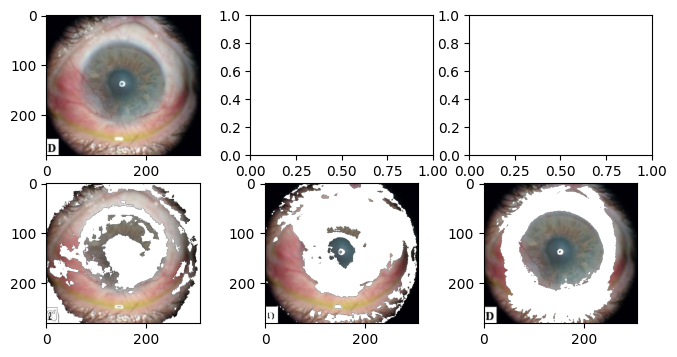

In [97]:
image = EyeTraumaAnalysis.Image("data/01_raw/00004_li.jpg")

import cv2
frame_HSV = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
frame_threshold1 = cv2.inRange(frame_HSV, (0, 0, 0), (30, 255,255))
target1 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold1)

frame_threshold2 = cv2.inRange(frame_HSV, (0, 50, 0), (255, 255,255))
target2 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold2)

frame_threshold3 = cv2.inRange(frame_HSV, (0, 0, 00), (255, 255,160))
target3 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold3)

fig, axs = plt.subplots(2, 3, figsize=(8,4))
axs[0,0].imshow(image.img)
axs[1,0].imshow(target1);
axs[1,1].imshow(target2);
axs[1,2].imshow(target3);
